# Tworzenie modelu MNIST

## Wczytanie bibliotek i danych

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

In [45]:
data = pd.read_csv('train.csv')
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 42000
Number of columns: 785


## Utworzenie datagenu

In [46]:
datagen = ImageDataGenerator(
            featurewise_center=False, 
            samplewise_center=False,  
            featurewise_std_normalization=False, 
            samplewise_std_normalization=False,  
            zca_whitening=False,  
            rotation_range=10,  
            zoom_range = 0.1,  
            width_shift_range=0.1,  
            height_shift_range=0.1,  
            horizontal_flip=False,  
            vertical_flip=False) 

## Transformacja danych i etykiet

In [47]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]


X_reshaped = X.values.reshape(-1, 28, 28, 1)

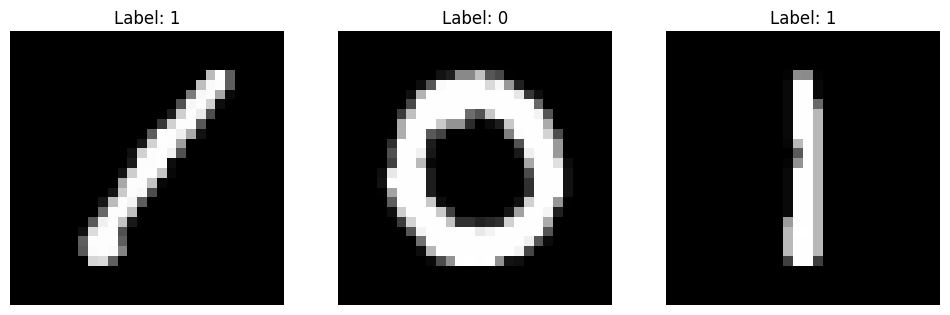

In [48]:
plt.figure(figsize=(12, 4)) 

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_reshaped[i], cmap='gray')
    plt.title(f"Label: {Y.iloc[i]}")
    plt.axis('off')
plt.show()

### Podział danych na zestaw trenujacy i testujacy

In [54]:
x_train , x_test , y_train , y_test = train_test_split(X_reshaped, Y, test_size=0.1)

### Skalowanie wartości pikseli do przedzialu [0,1]

In [55]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

datagen.fit(x_train)

### Zmiana etykiet na wartości one-hot encoded

In [56]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Architektura modelu

In [57]:


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

C:\Users\zxc24\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,213,610 (8.44 MB)

 Trainable params: 2,210,154 (8.43 MB)

 Non-trainable params: 3,456 (13.50 KB)

## Definiowanie optymalizatora

In [59]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### Dodanie dyniamiecznie zmieniającego się parametru nauki oraz wczesnego zatrzymania

In [60]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [61]:
decays = [(lambda x: 1e-3 * 0.9 ** x)(x) for x in range(10)]
i=1

for lr in decays:
    print("Epoch " + str(i) +" Learning Rate: " + str(lr))
    i+=1

Epoch 1 Learning Rate: 0.001
Epoch 2 Learning Rate: 0.0009000000000000001
Epoch 3 Learning Rate: 0.0008100000000000001
Epoch 4 Learning Rate: 0.0007290000000000002
Epoch 5 Learning Rate: 0.0006561000000000001
Epoch 6 Learning Rate: 0.00059049
Epoch 7 Learning Rate: 0.000531441
Epoch 8 Learning Rate: 0.0004782969000000001
Epoch 9 Learning Rate: 0.0004304672100000001
Epoch 10 Learning Rate: 0.0003874204890000001


In [62]:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True,
)

## Nauka modelu

In [63]:
batch_size = 64
epochs = 50

history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=1, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr, early_stopping])

Epoch 1/50


C:\Users\zxc24\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


590/590 ━━━━━━━━━━━━━━━━━━━━ 55s 85ms/step - accuracy: 0.7839 - loss: 0.7509 - val_accuracy: 0.9410 - val_loss: 0.1839 - learning_rate: 0.0010
Epoch 2/50
  1/590 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9375 - loss: 0.1706

C:\Users\zxc24\anaconda3\envs\myenv\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1706 - val_accuracy: 0.9424 - val_loss: 0.1802 - learning_rate: 9.0000e-04
Epoch 3/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 46s 78ms/step - accuracy: 0.9603 - loss: 0.1261 - val_accuracy: 0.9860 - val_loss: 0.0517 - learning_rate: 8.1000e-04
Epoch 4/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0931 - val_accuracy: 0.9857 - val_loss: 0.0539 - learning_rate: 7.2900e-04
Epoch 5/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 46s 78ms/step - accuracy: 0.9722 - loss: 0.0911 - val_accuracy: 0.9893 - val_loss: 0.0410 - learning_rate: 6.5610e-04
Epoch 6/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2308 - val_accuracy: 0.9898 - val_loss: 0.0395 - learning_rate: 5.9049e-04
Epoch 7/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.9763 - loss: 0.0756 - val_accuracy: 0.9871 - val_loss: 0.0421 - learning_rate: 5.3144e-04
Epoch 8/50
590/590 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.953

## Sprawdzanie skuteczności modelu

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test, axis=1)     

print(classification_report(y_true, y_pred_classes))

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      0.99      1.00       430
           2       1.00      1.00      1.00       394
           3       1.00      1.00      1.00       431
           4       0.99      0.99      0.99       387
           5       1.00      1.00      1.00       383
           6       1.00      1.00      1.00       417
           7       0.99      1.00      1.00       476
           8       1.00      1.00      1.00       434
           9       0.99      0.99      0.99       447

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)

array([[6.3296369e-07, 7.8020146e-10, 1.3408698e-08, ..., 3.0299162e-11,
        1.4972186e-06, 1.1950073e-09],
       [9.9998868e-01, 1.7076718e-07, 2.5178862e-08, ..., 3.7870045e-08,
        6.6528038e-08, 5.8056357e-06],
       [1.5895674e-08, 2.9178125e-08, 9.9999928e-01, ..., 4.3536357e-08,
        3.1963310e-08, 3.4980556e-09],
       ...,
       [3.8856374e-10, 4.7152188e-10, 5.9617347e-09, ..., 6.6813072e-10,
        8.9648761e-10, 2.8797562e-10],
       [2.1466976e-06, 1.7387207e-06, 9.9986899e-01, ..., 5.7037769e-06,
        9.2736118e-05, 2.0569059e-05],
       [2.3368084e-06, 9.3506927e-08, 9.8695736e-09, ..., 4.6125576e-10,
        8.9365318e-03, 2.0703981e-08]], dtype=float32)

In [71]:
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred_classes, average='weighted') 
print(precision)

0.9964351969053568


In [ ]:
plt.figure(figsize=(13, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(13, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.grid()
plt.show()

In [72]:
model.save('model.h5')